# Prediction of diabetes

In [32]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier




In [2]:
df=pd.read_csv("C://Users//ADMIN//Downloads//diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Spliting data into training and testing


In [3]:
x=df.drop(['Outcome'],axis=1)
y=df.Outcome
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [4]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [8]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)


In [9]:
X_train.shape


(614, 8)

In [10]:
y_train.shape

(614,)

In [11]:
X_test.shape


(154, 8)

In [12]:
y_test.shape


(154,)

# Bagging

In [13]:
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB

## Decision Tree bagger
bagger1 = BaggingClassifier(n_estimators = 50, random_state = 0)
bagger1.fit(X_train, y_train)

## Naive Bayes bagger
bagger2 = BaggingClassifier(base_estimator = GaussianNB(), random_state = 0)
bagger2.fit(X_train, y_train)

## Evaluate
print(np.mean(bagger1.predict(X_test) == y_test))
print(np.mean(bagger2.predict(X_test) == y_test))

0.7467532467532467
0.7597402597402597


In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf.fit(X_train, y_train)
rf_prediction=rf.predict(X_test)
print('Accuracy',np.mean(rf.predict(X_test) == y_test)*100)

Accuracy 76.62337662337663


In [22]:
c=confusion_matrix(y_test,rf_prediction)
a=accuracy_score(y_test,rf_prediction)
p=precision_score(y_test,rf_prediction)
r=recall_score(y_test,rf_prediction)

In [23]:
print('Confusion Matrix:\n',c)

Confusion Matrix:
 [[81 18]
 [18 37]]


In [24]:
print('Accuracy:',a*100)

Accuracy: 76.62337662337663


In [25]:
print('Recall:',r*100)


Recall: 67.27272727272727


In [26]:
print('Precision:',p*100)


Precision: 67.27272727272727


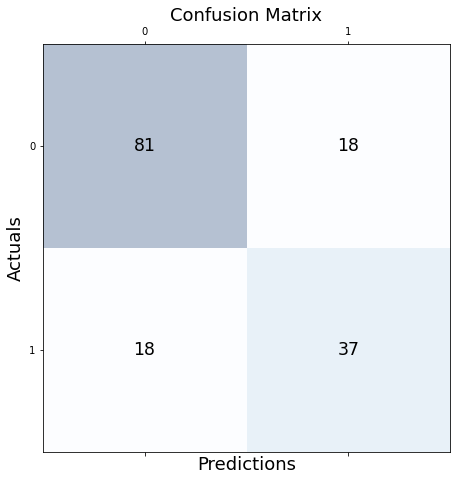

In [27]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(c, cmap=plt.cm.Blues, alpha=0.3)
for i in range(c.shape[0]):
    for j in range(c.shape[1]):
        ax.text(x=j, y=i,s=c[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Max Voting / Voting Classifier


In [33]:
estimator = [] 
estimator.append(('LR',LogisticRegression(solver ='lbfgs',multi_class ='multinomial',max_iter = 200))) 
estimator.append(('SVC', SVC(gamma ='auto', probability = True))) 
estimator.append(('DTC', DecisionTreeClassifier())) 

In [35]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

hard_voting = VotingClassifier(estimators = estimator, voting ='hard') 
hard_voting.fit(X_train, y_train) 
y_pred = hard_voting.predict(X_test)   

In [36]:
# Voting Classifier with soft voting 
soft_voting = VotingClassifier(estimators = estimator, voting ='soft') 
soft_voting.fit(X_train, y_train) 
y_pred = soft_voting.predict(X_test) 

In [37]:
# Using accuracy_score 
score = accuracy_score(y_test, y_pred) 
print("Soft Voting Score % d" % score) 

Soft Voting Score  0


# Averaging


In [38]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame

In [39]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=500, centers=3, n_features=2, cluster_std=2, random_state=2)

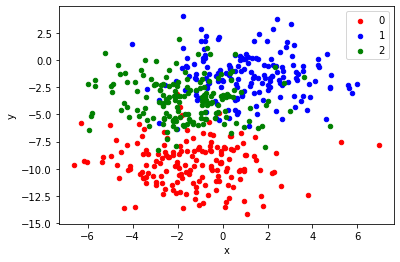

In [40]:
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

# Stacking


In [45]:
from sklearn.base import BaseEstimator,RegressorMixin, TransformerMixin

class stacking(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self,mod,meta_model):
        self.mod = mod
        self.meta_model = meta_model
        self.kf = KFold(n_splits=5, random_state=42, shuffle=True)
        
    def fit(self,X,y):
        self.saved_model = [list() for i in self.mod]
        oof_train = np.zeros((X.shape[0], len(self.mod)))
        
        for i,model in enumerate(self.mod):
            for train_index, val_index in self.kf.split(X,y):
                renew_model = clone(model)
                renew_model.fit(X[train_index], y[train_index])
                self.saved_model[i].append(renew_model)
                oof_train[val_index,i] = renew_model.predict(X[val_index])
        
        self.meta_model.fit(oof_train,y)
        return self
    
    def predict(self,X):
        whole_test = np.column_stack([np.column_stack(model.predict(X) for model in single_model).mean(axis=1) 
                                      for single_model in self.saved_model]) 
        return self.meta_model.predict(whole_test)
    
    def get_oof(self,X,y,test_X):
        oof = np.zeros((X.shape[0],len(self.mod)))
        test_single = np.zeros((test_X.shape[0],5))
        test_mean = np.zeros((test_X.shape[0],len(self.mod)))
        for i,model in enumerate(self.mod):
            for j, (train_index,val_index) in enumerate(self.kf.split(X,y)):
                clone_model = clone(model)
                clone_model.fit(X[train_index],y[train_index])
                oof[val_index,i] = clone_model.predict(X[val_index])
                test_single[:,j] = clone_model.predict(test_X)
            test_mean[:,i] = test_single.mean(axis=1)
        return oof, test_mean

In [46]:
from sklearn.impute import SimpleImputer


In [ ]:
stack_model = stacking(mod=[lasso,ridge,svr,ker,ela,bay],meta_model=ker)

In [ ]:
score = rmse_cv(stack_model,X_scaled_imputed,y_log_imputed)

In [ ]:
print(score.mean())

0.10770838136721914

# Blending

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_wine
# define dataset
X,y = load_wine().data,load_wine().target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=1)
x_val=pd.DataFrame(X_val)
x_test=pd.DataFrame(X_test)
model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)
val_pred1=model1.predict(X_val)
test_pred1=model1.predict(X_test)
val_pred1=pd.DataFrame(val_pred1)
test_pred1=pd.DataFrame(test_pred1)

model2 = KNeighborsClassifier()
model2.fit(X_train,y_train)
val_pred2=model2.predict(X_val)
test_pred2=model2.predict(X_test)
val_pred2=pd.DataFrame(val_pred2)
test_pred2=pd.DataFrame(test_pred2)

In [61]:
df_val=pd.concat([x_val, val_pred1,val_pred2],axis=1)
df_test=pd.concat([x_test, test_pred1,test_pred2],axis=1)

model = LogisticRegression()
model.fit(df_val,y_val)
model.score(df_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9166666666666666

# Boosting

In [7]:
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_wine
# define dataset
X,y = load_wine().data,load_wine().target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [8]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost = AdaBoostClassifier(random_state=1)
ada_boost.fit(X_train, y_train)
ada_boost.score(X_test,y_test)

0.8333333333333334

In [9]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
grad_boost.fit(X_train, y_train)
grad_boost.score(X_test,y_test)

0.9444444444444444